# Problem 8

This problem is about counting triangles in a graph, which has applications in social network analysis.

It has **four (4)** exercises, numbered 0-3, which are worth a total of ten (10) points.

## Background: Counting triangles in a social network

A social network may be modeled as an undirected graph, like the one shown below.

![An example of an undirected graph](./graph.png)

The _nodes_ (or _vertices_) of this graph, shown as numbered circles, might represent people, and the _edges_ (or links connecting them) might represent who is friends with whom. In this case, person 0 is friends with all the "odd birds" of this network, persons 1, 3, and 5, but has no direct connection to persons 2 and 4.

**Adjacency matrix.** Let $A$ be the _adjacency matrix_ representation of the graph, defined as follows. The entries of $A$ are either 0 or 1; and $a_{i,j}$ equals 1 if and only if there is an edge connecting nodes $i$ and $j$. For instance, for the graph shown above,

$$
A = \begin{bmatrix}
        0 & 1 & 0 & 1 & 0 & 1 \\
        1 & 0 & 0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 & 0 & 0 \\
        1 & 1 & 1 & 0 & 1 & 1 \\
        0 & 0 & 0 & 1 & 0 & 0 \\
        1 & 0 & 0 & 1 & 0 & 0
    \end{bmatrix}.
$$

Observe that the relationships are symmetric. For instance, 0 and 1 are mutually connected; therefore, both $a_{0,1}$ and $a_{1, 0}$ equal 1, and in general, $A = A^T$.

**Counting triangles.** One type of analysis one might perform on such a graph is _counting triangles_, that is, the number of relationships of the form $a$ knows $b$, $b$ knows $c$, and $c$ knows $a$. In the graph shown above, there are two such triangles: (0, 1, 3) and (0, 3, 5).

Here is one way to count triangles, which uses linear algebra.

First, let $A \cdot B$ denote matrix multiplication. That is, $C = A \cdot B$ means $c_{i,j} = \sum_k a_{i,k} b_{k, j}$.

Next, let $A \odot B$ denote _elementwise_ multiplication. That is, $E = A \odot B$ means $e_{i, j} = a_{i, j} b_{i, j}$.

Then, here is a two-step method to compute the number of triangles, which we'll denote as $t(A)$:

$$
\begin{eqnarray}
       C & = & (A \cdot A) \odot A \\
    t(A) & = & \frac{1}{6} \sum_{i, j} c_{i,j}.
\end{eqnarray}
$$

The first step computes a "count" matrix $C$. Each element, $c_{i,j}$, counts the number of triangles in which both $i$ and $j$ appear. For the example shown above, it turns out that $c_{0, 1} = c_{1,0} = 1$ since there is only one triangle that uses the edge $(0, 1)$, whereas $c_{0, 3} = c_{3, 0} = 2$ because the edge $(0, 3)$ appears in two triangles.

The second step sums all the elements of $C$. However, the sum alone will overcount the number of unique triangles by a factor of six (6), hence the additional factor of $\frac{1}{6}$. (Why?)

> Instead of summing all the entries of $A$, one can exploit symmetry and consider just the upper- or lower-triangle, but more on that later!

**Exercise 0** (3 points). Implement a function, **`count_triangles(A)`**, that implements the above formula. That is, given a symmetric Numpy array `A` representing the adjacency matrix of a graph, this function will return the number of triangles.

Your implementation should return a value of type **int**. For example, for the matrix in the sample,

```python
    assert count_triangles(A) == int(2)
```

In [1]:
import numpy as np

def count_triangles(A):
    assert (type(A) is np.ndarray) and (A.ndim == 2) and (A.shape[0] == A.shape[1])
    ###
    return int(np.multiply(A.dot(A),A).sum()/6)
    ###

A = np.array([[0, 1, 0, 1, 0, 1],
              [1, 0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0, 0],
              [1, 1, 1, 0, 1, 1],
              [0, 0, 0, 1, 0, 0],
              [1, 0, 0, 1, 0, 0]], dtype=int)

print(count_triangles(A))

2


In [2]:
# Test cell: `count_triangles_test`

ntri_A = count_triangles(A)
assert type(ntri_A) is int, "You should return a value of type `int`."
assert ntri_A == 2, "The graph only has 2 triangles, not {}".format(ntri_A)

print("\n(Passed part 1.)")


(Passed part 1.)


0 25 25.0
1 23 24.0
2 18 22.0
3 19 21.25
4 22 21.4
5 21 21.333333333333332
6 19 21.0
7 21 21.0
8 17 20.555555555555557
9 29 21.4
10 20 21.272727272727273
11 19 21.083333333333332
12 23 21.23076923076923
13 20 21.142857142857142
14 22 21.2
15 22 21.25
16 15 20.88235294117647
17 16 20.61111111111111
18 16 20.36842105263158
19 22 20.45
20 26 20.714285714285715
21 14 20.40909090909091
22 28 20.73913043478261
23 10 20.291666666666668
24 29 20.64


/usr/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional inde

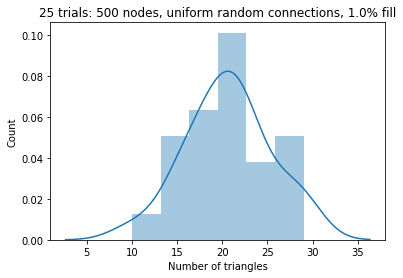

In [3]:
# Test cell: `count_triangles_test2`
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def check_count_triangles_large(n, den=1e-2):
    U_large = np.triu(np.random.rand(n, n) <= den).astype(int)
    np.fill_diagonal(U_large, 0)
    A_large = U_large + U_large.T
    return count_triangles(A_large)

n, den, k_max, mu, sd = 500, 1e-2, 25, 21, 5
nts = np.zeros(k_max, dtype=int)
for k in range(k_max):
    nts[k] = check_count_triangles_large(n, den)
    print(k, nts[k], np.sum(nts[:k+1])/(k+1))
sns.distplot(nts)
plt.xlabel("Number of triangles")
plt.ylabel("Count")
plt.title("{} trials: {} nodes, uniform random connections, {}% fill".format(k_max, n, den*100))

assert (mu-sd) <= np.mean(nts) <= (mu+sd), "mean={}".format(np.mean(nts))

## Actor network

Let's apply the triangle counts to a real "social" network, namely, the graph of actors who have appeared in the same movie. The dataset in this problem uses data collected on a crawl of the [Top 250 movies on the Internet Movie Database](https://github.com/napsternxg/IMDB-Graph/tree/master/Data/tutorial/tutorial) (circa 2012).

Let's start by loading this data, which is contained in a pair of JSON files.

> These data are pre-loaded on Vocareum. A copy is available at the following URL, but you may need to adapt the code below to use it. https://cse6040.gatech.edu/datasets/imdb.zip

In [4]:
import json

def fn(fn_base, dirname='./resource/asnlib/publicdata/'):
    return "{}{}".format(dirname, fn_base)

def load_json(basefile):
    filename = fn(basefile)
    json_file = open(filename, encoding="utf8")
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data

movies_json = load_json("imdb.json")
casts_json = load_json("imdb_cast.json")

**About the data.** There are two parts to the data.

The first is `movies_json`, which is a JSON formatted collection of movie titles and IDs. It is a list and here are the first few entries:

In [5]:
print("=== First five entries of `movies_json` ===\n")
for k, m in enumerate(movies_json[:5]):
    print("[{}] {}".format(k, m))
print("...")

=== First five entries of `movies_json` ===

[0] {'link': ['/title/tt0111161/'], 'name': ['The Shawshank Redemption']}
[1] {'link': ['/title/tt0068646/'], 'name': ['The Godfather']}
[2] {'link': ['/title/tt0071562/'], 'name': ['The Godfather: Part II']}
[3] {'link': ['/title/tt0110912/'], 'name': ['Pulp Fiction']}
[4] {'link': ['/title/tt0060196/'], 'name': ['The Good, the Bad and the Ugly']}
...


The second part is `casts_json`, which is a JSON formatted collection of movies with information about who appeared in the movie. It is also a list and here is the very first element.

Observe that it is a dictionary with information about a single movie, including the movie's title, it's IMDB URL, and list of actors (cast members).

In [6]:
print("=== First entry of `casts_json` ===\n")
print(json.dumps(casts_json[0], indent=3))

=== First entry of `casts_json` ===

{
   "movie": {
      "url": "http://www.imdb.com/title/tt0050083/fullcredits",
      "name": [
         "12 Angry Men (1957) - Full cast and crew"
      ]
   },
   "rank": 1,
   "cast": [
      {
         "link": [
            "/name/nm0000842/"
         ],
         "name": [
            "Martin Balsam"
         ]
      },
      {
         "link": [
            "/name/nm0275835/"
         ],
         "name": [
            "John Fiedler"
         ]
      },
      {
         "link": [
            "/name/nm0002011/"
         ],
         "name": [
            "Lee J. Cobb"
         ]
      },
      {
         "link": [
            "/name/nm0550855/"
         ],
         "name": [
            "E.G. Marshall"
         ]
      },
      {
         "link": [
            "/name/nm0001430/"
         ],
         "name": [
            "Jack Klugman"
         ]
      },
      {
         "link": [
            "/name/nm0083081/"
         ],
         "name": [
    

**Exercise 1** (2 points). Implement a function that, given the `casts_json` list, returns a dictionary that maps actor links to actor names.

In the example above, the first actor listed for "12 Angry Men" is `"Martin Balsam"`, whose link is `"/name/nm0000842/"`. Therefore, the dictionary that your function returns should include the key-value pair, `"/name/nm0000842/" : "Martin Balsam"`.

> _Slightly tricky bit._ You will need to pay careful attention to the structure of the output above to get this one right.

In [7]:
def gather_actors(casts):
    actors = dict() # Use to store (actor link) : (actor name) pairs
    for movie in casts:
        assert "cast" in movie
        ###
        for c in movie['cast']:
            actors[c['link'][0]] = c['name'][0]
        ###
    return actors

actors = gather_actors(casts_json)
print("Found {} unique actors.\n".format(len(actors)))

assert "/name/nm0000842/" in actors
print("'{}' -> '{}'".format("/name/nm0000842/", actors["/name/nm0000842/"]))
assert actors["/name/nm0000842/"] == "Martin Balsam"

Found 12975 unique actors.

'/name/nm0000842/' -> 'Martin Balsam'


In [8]:
# Test cell: `gather_actors_test`

assert ("/name/nm0872820/" in actors) and (actors["/name/nm0872820/"] == "Amedeo Trilli")
assert ("/name/nm0279786/" in actors) and (actors["/name/nm0279786/"] == "Shug Fisher")
assert ("/name/nm0802831/" in actors) and (actors["/name/nm0802831/"] == "Tony Sirico")
assert ("/name/nm0924692/" in actors) and (actors["/name/nm0924692/"] == "Dean White")
assert ("/name/nm0248074/" in actors) and (actors["/name/nm0248074/"] == "Jake Eberle")
assert ("/name/nm1067542/" in actors) and (actors["/name/nm1067542/"] == "Grace Keller")
assert ("/name/nm0903694/" in actors) and (actors["/name/nm0903694/"] == "Carl Voss")
assert ("/name/nm1504897/" in actors) and (actors["/name/nm1504897/"] == "Radka Kucharova")
assert ("/name/nm0644905/" in actors) and (actors["/name/nm0644905/"] == "Tae-kyung Oh")
assert ("/name/nm0727037/" in actors) and (actors["/name/nm0727037/"] == "Gary Riley")
assert ("/name/nm2006011/" in actors) and (actors["/name/nm2006011/"] == "Glenn Stanton")
assert ("/name/nm0193389/" in actors) and (actors["/name/nm0193389/"] == "John Curtis")
assert ("/name/nm0829189/" in actors) and (actors["/name/nm0829189/"] == "Avril Stewart")
assert ("/name/nm1211469/" in actors) and (actors["/name/nm1211469/"] == "Karine Asure")
assert ("/name/nm0598388/" in actors) and (actors["/name/nm0598388/"] == "Jacques Monod")
assert ("/name/nm1663820/" in actors) and (actors["/name/nm1663820/"] == "Michael Garnet Stewart")
assert ("/name/nm0009388/" in actors) and (actors["/name/nm0009388/"] == "Khosrow Abrishami")
assert ("/name/nm0020513/" in actors) and (actors["/name/nm0020513/"] == "Fletcher Allen")
assert ("/name/nm0615419/" in actors) and (actors["/name/nm0615419/"] == "John Murtagh")
assert ("/name/nm0120165/" in actors) and (actors["/name/nm0120165/"] == "Keith S. Bullock")
assert ("/name/nm0448560/" in actors) and (actors["/name/nm0448560/"] == "Colin Kenny")
assert ("/name/nm0882139/" in actors) and (actors["/name/nm0882139/"] == "David Ursin")
assert ("/name/nm1597244/" in actors) and (actors["/name/nm1597244/"] == "Carol Meirelles")
assert ("/name/nm0316079/" in actors) and (actors["/name/nm0316079/"] == "Paul Giamatti")
assert ("/name/nm3546231/" in actors) and (actors["/name/nm3546231/"] == "Leonard B. John")

print("\n(Passed!)")


(Passed!)


**Exercise 2** (2 points). Implement a function, **`count_appearances(casts)`**, that counts how many times each actor appeared in a movie. It should return a dictionary where the key is the actor's link and the value is the number of occurrences.

In [9]:
def count_appearances(casts):
    ###
    from collections import defaultdict
    a = defaultdict(int) 
    for movie in casts:
        assert "cast" in movie
        ###
        for c in movie['cast']:
            a[c['link'][0]] +=1
        ###
    return a
    
    ###
    
appearances = count_appearances(casts_json)
print("{} ({}) appeared in {} movies, according to your calculation.".format(actors['/name/nm0000151/'],
                                                                             '/name/nm0000151/',
                                                                             appearances['/name/nm0000151/']))

# Top 25 actors/actresses by number of appearances:
top25_appearances_links = sorted(appearances.keys(), key=appearances.__getitem__, reverse=True)[:25]
top25_appearances = [(link, actors[link], appearances[link]) for link in top25_appearances_links]
top25_appearances

Morgan Freeman (/name/nm0000151/) appeared in 7 movies, according to your calculation.


[('/name/nm0283170/', 'Bess Flowers', 12),
 ('/name/nm0001652/', 'John Ratzenberger', 10),
 ('/name/nm0000134/', 'Robert De Niro', 9),
 ('/name/nm0000071/', 'James Stewart', 9),
 ('/name/nm0000033/', 'Alfred Hitchcock', 9),
 ('/name/nm0180679/', 'Gino Corrado', 8),
 ('/name/nm0528802/', 'Sherry Lynn', 8),
 ('/name/nm0000151/', 'Morgan Freeman', 7),
 ('/name/nm0000148/', 'Harrison Ford', 7),
 ('/name/nm0569680/', 'Mickie McGowan', 7),
 ('/name/nm0000168/', 'Samuel L. Jackson', 6),
 ('/name/nm0000114/', 'Steve Buscemi', 6),
 ('/name/nm0000142/', 'Clint Eastwood', 6),
 ('/name/nm0000323/', 'Michael Caine', 6),
 ('/name/nm0915989/', 'Hugo Weaving', 6),
 ('/name/nm0000704/', 'Elijah Wood', 6),
 ('/name/nm0602100/', 'Bert Moorhouse', 6),
 ('/name/nm0869863/', 'Arthur Tovey', 6),
 ('/name/nm0003424/', 'Hank Mann', 6),
 ('/name/nm0000122/', 'Charles Chaplin', 6),
 ('/name/nm0639444/', "William H. O'Brien", 6),
 ('/name/nm0000246/', 'Bruce Willis', 5),
 ('/name/nm0000199/', 'Al Pacino', 5),
 ('

In [10]:
# Test cell: `count_appearances_test`

assert appearances['/name/nm4723252/'] == 1 # Shirin Azimiyannezhad
assert appearances['/name/nm0574436/'] == 1 # Hilton McRae
assert appearances['/name/nm1753600/'] == 2 # Maciej Kowalewski
assert appearances['/name/nm1595614/'] == 1 # Diego Batista
assert appearances['/name/nm0201349/'] == 1 # Daphne Darling
assert appearances['/name/nm0642138/'] == 1 # Dennis O'Neill
assert appearances['/name/nm3325895/'] == 1 # Kyle Patrick Brennan
assert appearances['/name/nm0660998/'] == 1 # Charles Paraventi
assert appearances['/name/nm0703600/'] == 1 # Eddie Quillan
assert appearances['/name/nm0629697/'] == 1 # Rachel Nichols
assert appearances['/name/nm2715776/'] == 1 # Sharlene Grover
assert appearances['/name/nm0027323/'] == 1 # Richard Anderson
assert appearances['/name/nm0154021/'] == 2 # Geoffrey Chater
assert appearances['/name/nm0180987/'] == 1 # Lloyd Corrigan
assert appearances['/name/nm5523580/'] == 1 # Madhav Vaze
assert appearances['/name/nm0798620/'] == 1 # Ruth Silveira
assert appearances['/name/nm3193186/'] == 1 # Rubina Ali
assert appearances['/name/nm0361876/'] == 1 # Nigel Harbach
assert appearances['/name/nm0560983/'] == 1 # Michael Mauree
assert appearances['/name/nm0665886/'] == 2 # Lee Patrick
assert appearances['/name/nm0676349/'] == 1 # Brock Peters
assert appearances['/name/nm4587948/'] == 1 # Francesca Ortenzio
assert appearances['/name/nm0366873/'] == 1 # Neill Hartley
assert appearances['/name/nm0219666/'] == 1 # Reginald Denny
assert appearances['/name/nm2803526/'] == 1 # Don Kress

print("\n(Passed.)")


(Passed.)


In [11]:
# Test cell: `count_appearances_test`

assert appearances['/name/nm4723252/'] == 1 # Shirin Azimiyannezhad
assert appearances['/name/nm0574436/'] == 1 # Hilton McRae
assert appearances['/name/nm1753600/'] == 2 # Maciej Kowalewski
assert appearances['/name/nm1595614/'] == 1 # Diego Batista
assert appearances['/name/nm0201349/'] == 1 # Daphne Darling
assert appearances['/name/nm0642138/'] == 1 # Dennis O'Neill
assert appearances['/name/nm3325895/'] == 1 # Kyle Patrick Brennan
assert appearances['/name/nm0660998/'] == 1 # Charles Paraventi
assert appearances['/name/nm0703600/'] == 1 # Eddie Quillan
assert appearances['/name/nm0629697/'] == 1 # Rachel Nichols
assert appearances['/name/nm2715776/'] == 1 # Sharlene Grover
assert appearances['/name/nm0027323/'] == 1 # Richard Anderson
assert appearances['/name/nm0154021/'] == 2 # Geoffrey Chater
assert appearances['/name/nm0180987/'] == 1 # Lloyd Corrigan
assert appearances['/name/nm5523580/'] == 1 # Madhav Vaze
assert appearances['/name/nm0798620/'] == 1 # Ruth Silveira
assert appearances['/name/nm3193186/'] == 1 # Rubina Ali
assert appearances['/name/nm0361876/'] == 1 # Nigel Harbach
assert appearances['/name/nm0560983/'] == 1 # Michael Mauree
assert appearances['/name/nm0665886/'] == 2 # Lee Patrick
assert appearances['/name/nm0676349/'] == 1 # Brock Peters
assert appearances['/name/nm4587948/'] == 1 # Francesca Ortenzio
assert appearances['/name/nm0366873/'] == 1 # Neill Hartley
assert appearances['/name/nm0219666/'] == 1 # Reginald Denny
assert appearances['/name/nm2803526/'] == 1 # Don Kress

print("\n(Passed.)")


(Passed.)


**Exercise 3** (3 points). For each actor, determines the number of triangles containing him or her. Store this result in dictionary named **`tri_counts`**, where **`tri_counts[link]`** stores the triangle count for the actor whose link is given by `link`.

> _Remark 0._ For this problem, the graph should be defined as follows. Each actor is a node; an edge exists between two actors if they appeared in the same movie.
>
> _Remark 1._ The choice of method to solve this exercise is open-ended. We have suggested the linear algebraic technique shown above; however, feel free to use any other computational approach that makes sense to you and can be implemented with reasonable efficiency -- see _Remark 2_, below.
>
> _Remark 2._ Whatever method you choose, it will be critical to exploit the sparsity of the actor network. That is, observe that there are nearly $n=13,\!000$ actors in this dataset, so any method that scales like $\mathcal{O}(n^2)$ (or worse) is not likely to pass the autograder's time limit.

In [12]:
###
from collections import defaultdict
casts = casts_json.copy()
m = defaultdict(set)
for movie in casts:
    assert "cast" in movie
    ###
    mname = movie['movie']['name'][0]
    for c in movie['cast']:
        m[c['link'][0]].add(mname)

actli = list(m.keys())
res = np.zeros((len(actli),len(actli)))
for i in range(len(actli)):
    for j in range(i+1, len(actli)):
        res[i][j] = bool(m[actli[i]]& m[actli[j]])
R = res + res.T - np.diag(res).sum()

r = np.multiply(R.dot(R),R).sum(axis=1)/len(actli)
tri_counts = dict(zip(list(m.keys()), r)) 
###


In [13]:
# Test cell: `tri_counts_test0` -- 1 point for computing something

# From https://docs.python.org/3/howto/sorting.html
assert type(tri_counts) is dict, "Per the instructions, `tri_counts` should be a dictonary."
top10_actor_links = sorted(tri_counts.keys(), key=tri_counts.__getitem__, reverse=True)[:10]
top10_actor_counts = [(link, actors[link], tri_counts[link]) for link in top10_actor_links]
top10_actor_names = [n for _, n, _ in top10_actor_counts]
print("Actors in the most triangles:\n{}".format(top10_actor_counts))

print("\n(Passed part 1 of 3.)")

Actors in the most triangles:
[('/name/nm0180679/', 'Gino Corrado', 11.686319845857419), ('/name/nm0000198/', 'Gary Oldman', 11.604161849710982), ('/name/nm0000151/', 'Morgan Freeman', 11.154527938342968), ('/name/nm0000323/', 'Michael Caine', 10.735722543352601), ('/name/nm0175410/', "Frank O'Connor", 10.595761078998073), ('/name/nm0000288/', 'Christian Bale', 10.553526011560693), ('/name/nm0614165/', 'Cillian Murphy', 10.520847784200386), ('/name/nm2720736/', 'Ernest Pierce', 10.173564547206166), ('/name/nm0602100/', 'Bert Moorhouse', 9.75383429672447), ('/name/nm0227117/', 'John Dilson', 9.320077071290944)]

(Passed part 1 of 3.)


In [14]:
# Test cell: `tri_counts_test1` -- 2 points for getting at least half the top actors

our_top10 = {'Bert Moorhouse', 'Christian Bale', 'Cillian Murphy', \
             'Ernest Pierce', "Frank O'Connor", 'Gary Oldman', \
             'Gino Corrado', 'Michael Caine', 'Milton Kibbee', \
             'Morgan Freeman'}
your_top10 = set(top10_actor_names)
assert len(our_top10 & your_top10) >= 5, "Got less than half the top 10 right."

print("\n(Passed part 2 of 3.)")


(Passed part 2 of 3.)


In [15]:
# UPDATED test cell: `tri_counts_test2` -- 1 point for getting most of the rank-ordered top 10 list

our_top10_list_weighted = ['Gino Corrado', "Frank O'Connor", 'Bert Moorhouse', 'Gary Oldman',
                           'Michael Caine', 'Morgan Freeman', 'Cillian Murphy', 'Christian Bale',
                           'Milton Kibbee', 'Ernest Pierce']
our_top10_list_unweighted = ['Gary Oldman', 'Gino Corrado', 'Morgan Freeman', 'Michael Caine',
                             'Christian Bale', 'Cillian Murphy', "Frank O'Connor", 'Ernest Pierce',
                             'Bert Moorhouse', 'John Dilson']

# Meta-comment: The top actors by number of appearances includes men and women,
# but the actors that appear in the most triangles seems to be dominated by men!

our_top_list_merged = set(our_top10_list_weighted) | set(our_top10_list_unweighted)

assert len(set(our_top_list_merged) & set(top10_actor_names)) >= 9, "Too many mismatches in your top 10 list"
print("\n(Passed part 3 of 3.)")


(Passed part 3 of 3.)


**Fin!** That's the end of this problem, which is the last problem of the final exam. Don't forget to submit your work!